In [518]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [519]:
btc_1h = pd.read_csv ('./btc_1h_backtest.csv', encoding='unicode_escape')

In [520]:
btc_1h['time'] = btc_1h['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_1h['time'] = pd.to_datetime(btc_1h["time"])
btc_1h.set_index("time", inplace = True)

In [521]:
btc_1h= btc_1h[1000:7000]
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI
time,,,,,,,,,,,,
2021-02-11 17:00:00,47718.0,47058.78414,46184.11125,46990.13464,45378.08785,47796.15804,44572.06445,48602.18143,43766.04106,1540.684,94.800547,66.922614
2021-02-11 18:00:00,47450.5,47145.83211,46299.23750,47099.33065,45499.14434,47899.42380,44699.05119,48699.51696,43898.95804,1048.285,85.514407,63.497614
2021-02-11 19:00:00,47740.0,47277.86942,46430.21591,47221.98098,45638.45083,48013.74605,44846.68576,48805.51112,44054.92069,950.959,78.679968,65.552353
2021-02-11 20:00:00,47847.0,47404.34288,46559.01446,47330.79631,45787.23261,48102.57816,45015.45076,48874.36001,44243.66890,567.045,77.945729,66.307257
2021-02-11 21:00:00,47122.0,47341.60002,46610.19496,47446.67097,45773.71896,48283.14697,44937.24295,49119.62298,44100.76695,2062.265,69.675182,57.165946


In [522]:
btc_1h.keys()

Index(['close', 'EMA 1', 'EMA 2', 'Upper ATR 1', 'Lower ATR 1', 'Upper ATR 2',
       'Lower ATR 2', 'Upper ATR 3', 'Lower ATR 3', 'Volume', 'K', 'RSI'],
      dtype='object')

In [523]:
def buySell(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['RSI'][i] < 20 and btc_1h['close'][i] <= btc_1h['Lower ATR 3'][i]):
      if flag != 1:
        sigPriceBuy.append(btc_1h['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h ['RSI'][i] > 50 and btc_1h['close'][i] >= btc_1h['Upper ATR 1'][i]):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [524]:
buySell = buySell(btc_1h)
btc_1h['Buy Signal Price'] = buySell[0]
btc_1h['Sell Signal Price'] = buySell[1]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price,Sell Signal Price
time,,,,,,,,,,,,,,
2021-02-11 17:00:00,47718.0,47058.78414,46184.11125,46990.13464,45378.08785,47796.15804,44572.06445,48602.18143,43766.04106,1540.684,94.800547,66.922614,NaN,47718.0
2021-02-11 18:00:00,47450.5,47145.83211,46299.23750,47099.33065,45499.14434,47899.42380,44699.05119,48699.51696,43898.95804,1048.285,85.514407,63.497614,NaN,NaN
2021-02-11 19:00:00,47740.0,47277.86942,46430.21591,47221.98098,45638.45083,48013.74605,44846.68576,48805.51112,44054.92069,950.959,78.679968,65.552353,NaN,NaN
2021-02-11 20:00:00,47847.0,47404.34288,46559.01446,47330.79631,45787.23261,48102.57816,45015.45076,48874.36001,44243.66890,567.045,77.945729,66.307257,NaN,NaN
2021-02-11 21:00:00,47122.0,47341.60002,46610.19496,47446.67097,45773.71896,48283.14697,44937.24295,49119.62298,44100.76695,2062.265,69.675182,57.165946,NaN,NaN


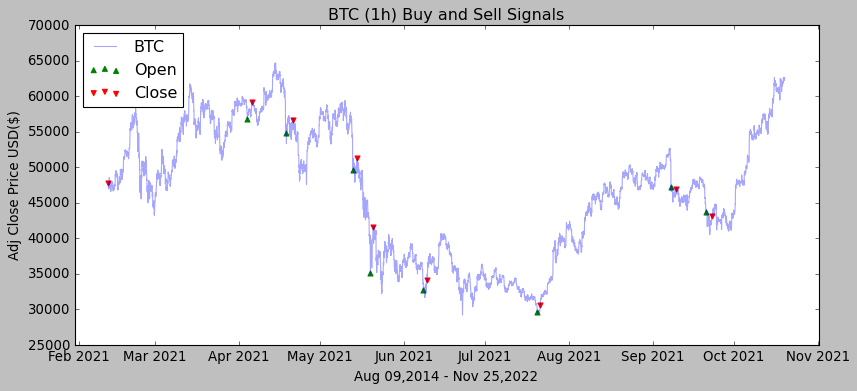

In [525]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
plt.plot(btc_1h['Buy Signal Price'], label='', alpha=0.35)
plt.plot(btc_1h['Sell Signal Price'],label='', alpha=0.35)
plt.scatter(btc_1h.index, btc_1h['Buy Signal Price'], label ='Open', marker='^',color='green')
plt.scatter(btc_1h.index, btc_1h['Sell Signal Price'],label='Close', marker='v', color='red')
plt.title('BTC (1h) Buy and Sell Signals')
plt.xlabel("Aug 09,2014 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()

In [547]:
def buySell_RSI(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['close'][i] >= btc_1h ["Upper ATR 3"][i] and btc_1h ['RSI'][i] > 80):
      if flag != 1:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h ['close'][i] <= btc_1h ["Lower ATR 1"][i] and btc_1h["RSI"][i] < 40):
      if flag != 0:
        sigPriceBuy.append(btc_1h["close"][i])
        sigPriceSell.append(np.nan)
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceSell, sigPriceBuy)

In [548]:
buySell_RSI = buySell_RSI(btc_1h)
btc_1h['Buy Signal Price RSI'] = buySell_RSI[1]
btc_1h['Sell Signal Price RSI'] = buySell_RSI[0]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price,Sell Signal Price,Buy Signal Price RSI,Sell Signal Price RSI
time,,,,,,,,,,,,,,,,
2021-02-11 17:00:00,47718.0,47058.78414,46184.11125,46990.13464,45378.08785,47796.15804,44572.06445,48602.18143,43766.04106,1540.684,94.800547,66.922614,NaN,47718.0,NaN,NaN
2021-02-11 18:00:00,47450.5,47145.83211,46299.23750,47099.33065,45499.14434,47899.42380,44699.05119,48699.51696,43898.95804,1048.285,85.514407,63.497614,NaN,NaN,NaN,NaN
2021-02-11 19:00:00,47740.0,47277.86942,46430.21591,47221.98098,45638.45083,48013.74605,44846.68576,48805.51112,44054.92069,950.959,78.679968,65.552353,NaN,NaN,NaN,NaN
2021-02-11 20:00:00,47847.0,47404.34288,46559.01446,47330.79631,45787.23261,48102.57816,45015.45076,48874.36001,44243.66890,567.045,77.945729,66.307257,NaN,NaN,NaN,NaN
2021-02-11 21:00:00,47122.0,47341.60002,46610.19496,47446.67097,45773.71896,48283.14697,44937.24295,49119.62298,44100.76695,2062.265,69.675182,57.165946,NaN,NaN,NaN,NaN


In [549]:
btc_1h.describe()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price,Sell Signal Price,Buy Signal Price RSI,Sell Signal Price RSI
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,8.000000,9.000000,10.000000,9.000000
mean,46727.567667,46718.501432,46700.587018,47269.804750,46131.369286,47839.022481,45562.151555,48408.240213,44992.933823,2045.764224,5.116542e+01,51.348413,43683.875000,45700.944444,52132.450000,52042.333333
std,8991.849575,8966.901143,8925.300640,8970.144427,8887.273638,9021.703347,8856.151231,9079.863007,8832.006411,2292.254934,3.316000e+01,12.344404,10252.165168,9477.886353,8393.514403,10687.538637
min,29216.500000,29680.507330,29815.961530,30048.048090,29570.367970,30280.134650,29320.202490,30512.221210,28866.497710,136.332000,-2.130000e-14,12.911394,29599.500000,30630.000000,38732.500000,32101.000000
25%,38556.500000,38521.090738,38500.097365,39087.848677,37861.077052,39801.274302,37236.033857,40344.226140,36536.357825,809.872000,1.979447e+01,42.989429,34478.250000,41657.500000,47135.875000,47099.500000
50%,47530.000000,47558.896610,47587.420495,48069.057250,47065.499220,48553.272495,46534.329595,48986.642665,45958.416720,1459.394500,5.087985e+01,51.425510,45477.750000,46985.000000,55802.750000,54409.000000
75%,54918.375000,54945.657470,55002.271155,55676.271285,54362.496300,56337.276672,53742.731540,56973.147473,53121.123733,2467.302500,8.368265e+01,59.910756,50905.500000,51237.000000,58171.375000,61200.000000
max,64659.500000,64176.529860,63682.513780,64333.074710,63031.952850,65023.991850,62388.941890,65786.139590,61771.101990,53613.055000,1.000000e+02,90.804055,56779.000000,59149.500000,62319.000000,62990.500000


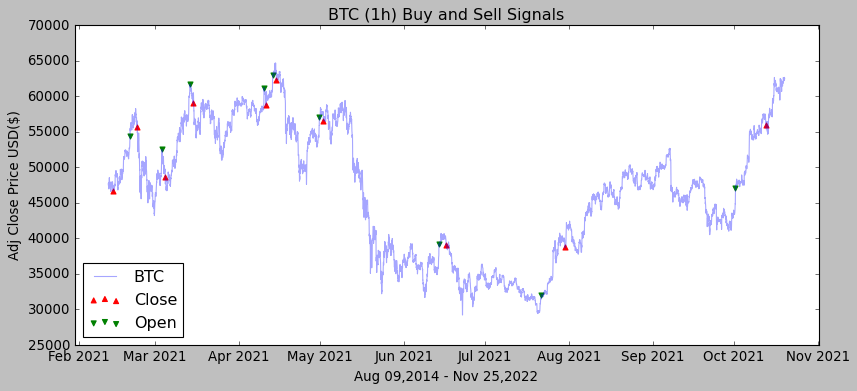

In [550]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
plt.plot(btc_1h['Buy Signal Price RSI'], label='', alpha=0.35)
plt.plot(btc_1h['Sell Signal Price RSI'],label='', alpha=0.35)
plt.scatter(btc_1h.index, btc_1h['Buy Signal Price RSI'], label ='Close', marker='^',color='red')
plt.scatter(btc_1h.index, btc_1h['Sell Signal Price RSI'],label='Open', marker='v', color='green')
plt.title('BTC (1h) Buy and Sell Signals')
plt.xlabel("Aug 09,2014 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='lower left')
plt.show()